In [1]:
######################################################################
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix, find
from itertools import combinations
import copy
from sklearn.metrics import accuracy_score
from collections import Counter

In [2]:
### Homework 1. ISYE 6740

# Ensure you are not using an absolute path. use a relative data path.
# As long as your code is run in a place where a 'data' folder exists, with a 'file.csv' file inside, you'll have no trouble.

## Image compression using clustering.


In [3]:
## Input pixels

#input k - the desired number of clusters

In [4]:
# Python program to read an write an image
 
import imageio as iio
 
# read an image 
img_coastalabstract = iio.imread("coastal-abstract.jpeg") 

C:\Users\mughees.khan\AppData\Local\Temp\ipykernel_22236\3807516818.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_coastalabstract = iio.imread("coastal-abstract.jpeg")


In [5]:
#check structure of data
type(img_coastalabstract)

numpy.ndarray

In [6]:
str(img_coastalabstract)

'[[[197  98  67]\n  [199 100  69]\n  [203 106  73]\n  ...\n  [150  71  64]\n  [151  67  57]\n  [147  59  47]]\n\n [[198 105  72]\n  [209 116  82]\n  [219 129  94]\n  ...\n  [153 117 105]\n  [155 113  99]\n  [159 113  98]]\n\n [[219 140 101]\n  [226 147 108]\n  [233 154 113]\n  ...\n  [143 157 144]\n  [154 165 151]\n  [167 173 159]]\n\n ...\n\n [[186 133  55]\n  [170 117  37]\n  [180 130  45]\n  ...\n  [ 64  38  21]\n  [ 71  46  24]\n  [ 80  55  33]]\n\n [[166 112  38]\n  [142  89  11]\n  [153 101  18]\n  ...\n  [ 58  30   8]\n  [ 58  31   4]\n  [ 64  37   8]]\n\n [[139  83   9]\n  [114  58   0]\n  [128  73   0]\n  ...\n  [ 74  44  20]\n  [ 97  67  39]\n  [120  89  58]]]'

In [7]:
## Data consists of an array - one row is a data point (pixel), 3 columns RGB, values 0 to 255

In [8]:
img_coastalabstract

array([[[197,  98,  67],
        [199, 100,  69],
        [203, 106,  73],
        ...,
        [150,  71,  64],
        [151,  67,  57],
        [147,  59,  47]],

       [[198, 105,  72],
        [209, 116,  82],
        [219, 129,  94],
        ...,
        [153, 117, 105],
        [155, 113,  99],
        [159, 113,  98]],

       [[219, 140, 101],
        [226, 147, 108],
        [233, 154, 113],
        ...,
        [143, 157, 144],
        [154, 165, 151],
        [167, 173, 159]],

       ...,

       [[186, 133,  55],
        [170, 117,  37],
        [180, 130,  45],
        ...,
        [ 64,  38,  21],
        [ 71,  46,  24],
        [ 80,  55,  33]],

       [[166, 112,  38],
        [142,  89,  11],
        [153, 101,  18],
        ...,
        [ 58,  30,   8],
        [ 58,  31,   4],
        [ 64,  37,   8]],

       [[139,  83,   9],
        [114,  58,   0],
        [128,  73,   0],
        ...,
        [ 74,  44,  20],
        [ 97,  67,  39],
        [120,  89,  58]]

In [9]:

# implement on img_coastalabstract
pixels = img_coastalabstract
 
# Convert to 2D array (flattened)
pixels_2d_coastalabstract = pixels.reshape(-1, 3)

def initialize_centroids(pixels, k):
    """Randomly initializes k centroids from the dataset."""
    np.random.seed(123)  
    indices = np.random.choice(pixels.shape[0], k, replace=False)
    return pixels[indices]

def assign_clusters(pixels, centroids):
    """Assigns each pixel to the nearest centroid using squared l2 norm."""
    distances = np.sum((pixels[:, np.newaxis] - centroids) ** 2, axis=2)
    return np.argmin(distances, axis=1)

#squared l-2 norm
def update_centroids(pixels, labels, k):
    """Updates the centroids as the mean of the assigned points."""
    new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(pixels, k, max_iters = 1000):
    """Performs k-means clustering and returns labels, number of iterations, and time taken."""
    centroids = initialize_centroids(pixels, k)
    start_time = time.time()
    
    for i in range(max_iters):
        labels = assign_clusters(pixels, centroids)
        new_centroids = update_centroids(pixels, labels, k)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    elapsed_time = time.time() - start_time
    return labels.reshape(-1, 1), i + 1, elapsed_time

 

In [10]:

# Loop through different values of k
k_values = [2, 4, 8, 16, 32]

# store results in dict
results = {}

for k in k_values:
    start_time = time.time()
    labels = k_means(pixels_2d_coastalabstract, k)

    elapsed_time = time.time() - start_time
    results[k] = { 
        "labels": labels,
        "elapsed_time": elapsed_time
    }
    print(f"Labels for k={k}:\n{labels}\n") 

Labels for k=2:
(array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64), 12, 0.12462830543518066)

Labels for k=4:
(array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int64), 25, 0.4129598140716553)

Labels for k=8:
(array([[6],
       [6],
       [6],
       ...,
       [2],
       [7],
       [7]], dtype=int64), 69, 1.7273194789886475)

Labels for k=16:
(array([[11],
       [11],
       [11],
       ...,
       [ 7],
       [ 7],
       [15]], dtype=int64), 126, 6.275233745574951)

Labels for k=32:
(array([[27],
       [27],
       [27],
       ...,
       [19],
       [15],
       [24]], dtype=int64), 211, 20.32509970664978)



In [11]:
# determine optimal k using elbow method
#define function to calculate within-cluster sum of squares
def k_means_inertia(pixels, k, max_iters=100):
    centroids = initialize_centroids(pixels, k)
    
    for _ in range(max_iters):
        labels = assign_clusters(pixels, centroids)
        new_centroids = update_centroids(pixels, labels, k)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    # within-cluster sum of squares
    inertia = np.sum(np.min(np.sum((pixels[:, np.newaxis] - centroids) ** 2, axis=2), axis=1))
    return inertia




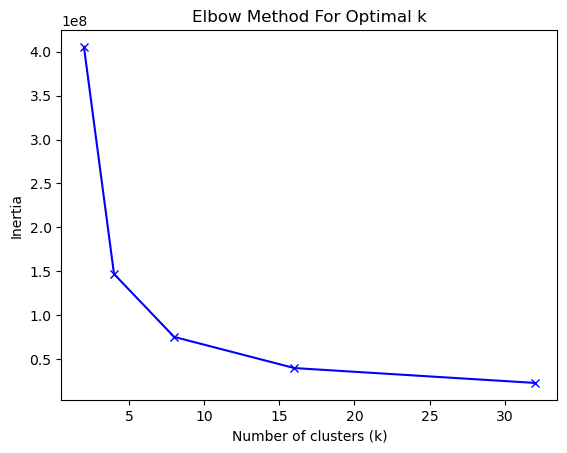

In [12]:

# Range of k values to try
k_values = [2, 4, 8, 16, 32]
inertias = []

for k in k_values:
    inertia = k_means_inertia(pixels_2d_coastalabstract, k)
    inertias.append(inertia)

# Plotting the Elbow
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# How to handle empty clusters when k is too large?

In [14]:
#### read football image 
img_football = iio.imread("football.bmp") 
 
# Convert to 2D array (flattened)
pixels_2d_football = img_football.reshape(-1, 3)
# Loop through different values of k
k_values = [2, 4, 8, 16, 32]

# store results in dict
results = {}


# store results in dict
results = {}

for k in k_values:
    start_time = time.time()
    labels = k_means(pixels_2d_football, k)

    elapsed_time = time.time() - start_time
    results[k] = { 
        "labels": labels,
        "elapsed_time": elapsed_time
    }
    print(f"Labels for k={k}:\n{labels}\n") 



C:\Users\mughees.khan\AppData\Local\Temp\ipykernel_22236\2205514472.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_football = iio.imread("football.bmp")


Labels for k=2:
(array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64), 23, 0.6885251998901367)

Labels for k=4:
(array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int64), 46, 2.4638514518737793)

Labels for k=8:
(array([[0],
       [0],
       [0],
       ...,
       [5],
       [5],
       [5]], dtype=int64), 52, 4.736349582672119)

Labels for k=16:
(array([[15],
       [15],
       [15],
       ...,
       [ 1],
       [ 1],
       [ 5]], dtype=int64), 274, 48.88405513763428)

Labels for k=32:
(array([[26],
       [26],
       [26],
       ...,
       [ 1],
       [30],
       [30]], dtype=int64), 142, 44.12876319885254)



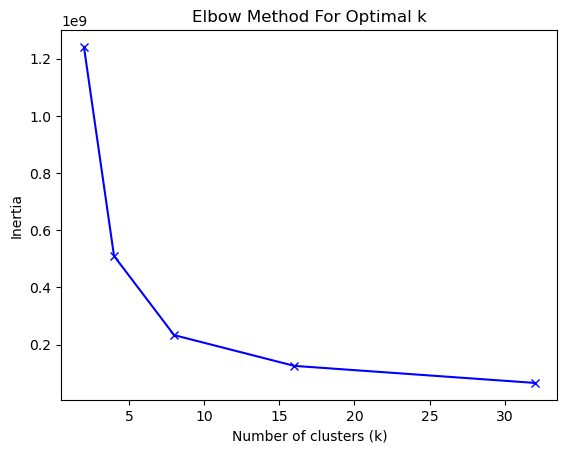

In [15]:

# Range of k values to try
k_values = [2, 4, 8, 16, 32]
inertias = []

for k in k_values:
    inertia = k_means_inertia(pixels_2d_football, k)
    inertias.append(inertia)

# Plotting the Elbow
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:

#### read third image 
img_cat = iio.imread("cat.jpg") 
 
# Convert to 2D array (flattened)
pixels_2d_cat = img_cat.reshape(-1, 3)
# Loop through different values of k
k_values = [2, 4, 8, 16, 32]

# store results in dict
results = {}


# store results in dict
results = {}

for k in k_values:
    start_time = time.time()
    labels = k_means(pixels_2d_cat, k)

    elapsed_time = time.time() - start_time
    results[k] = { 
        "labels": labels,
        "elapsed_time": elapsed_time
    }
    print(f"Labels for k={k}:\n{labels}\n") 




C:\Users\mughees.khan\AppData\Local\Temp\ipykernel_22236\3216340287.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_cat = iio.imread("cat.jpg")


Labels for k=2:
(array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64), 9, 0.0668327808380127)

Labels for k=4:
(array([[0],
       [0],
       [0],
       ...,
       [2],
       [2],
       [2]], dtype=int64), 26, 0.2673680782318115)

Labels for k=8:
(array([[0],
       [0],
       [0],
       ...,
       [4],
       [4],
       [4]], dtype=int64), 109, 1.7632086277008057)

Labels for k=16:
(array([[10],
       [10],
       [10],
       ...,
       [ 2],
       [ 2],
       [ 2]], dtype=int64), 70, 2.0969462394714355)

Labels for k=32:
(array([[ 5],
       [ 5],
       [ 5],
       ...,
       [20],
       [20],
       [20]], dtype=int64), 179, 10.1263108253479)



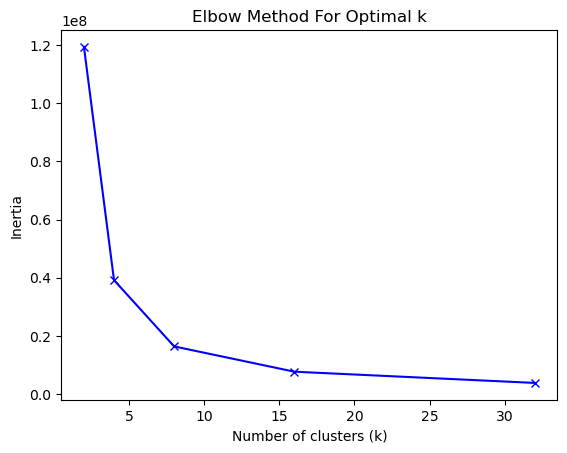

In [17]:

# Range of k values to try
k_values = [2, 4, 8, 16, 32]
inertias = []

for k in k_values:
    inertia = k_means_inertia(pixels_2d_cat, k)
    inertias.append(inertia)

# Plotting the Elbow
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
### MNIST Dataset clustering

In [19]:
### Import file
import scipy.io as sp
mnist = sp.loadmat("mnist_10digits.mat")

In [20]:
print(mnist.keys())

dict_keys(['__header__', '__version__', '__globals__', 'xtrain', 'ytrain', 'xtest', 'ytest'])


In [21]:
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Oct 13 20:00:03 2020',
 '__version__': '1.0',
 '__globals__': [],
 'xtrain': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytrain': array([[5, 0, 4, ..., 5, 6, 8]], dtype=int64),
 'xtest': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytest': array([[7, 2, 1, ..., 4, 5, 6]], dtype=int64)}

In [22]:
# Standardize features - map the range of features from 0, 255 to 0 to 1

# Assuming 'data' is your dictionary containing the MNIST data

xtrain = mnist['xtrain'].astype(np.float32)
xtest = mnist['xtest'].astype(np.float32)

mean = np.mean(xtrain)
std = np.std(xtrain)

xtrain_standardized = (xtrain - mean) / std
xtest_standardized = (xtest - mean) / std

# Replace the original data with standardized data
mnist['xtrain'] = xtrain_standardized
mnist['xtest'] = xtest_standardized

In [23]:
#mnist['xtrain']
#implement k - means with k of 10
labels = k_means(mnist['xtrain'], 10)
print(labels)

(array([[2],
       [6],
       [3],
       ...,
       [2],
       [1],
       [7]], dtype=int64), 163, 230.54409432411194)


In [24]:
# Extract xtest from the dataset and flatten it
y_true = mnist['xtest'].flatten()


In [25]:
# Unpack labels
if isinstance(labels, tuple):
    labels = labels[0]
labels = labels.flatten()

In [26]:
# Function to calculate purity score for each cluster


def purity_score_per_cluster(y_true, y_pred):
    y_true = y_true.flatten()  # Ensure y_true is 1D
    cluster_purity = {}
    unique_clusters = np.unique(y_pred)

    for cluster in unique_clusters:
        indices = np.where(y_pred == cluster)[0]
        true_labels_in_cluster = y_true[indices]
        
        if len(true_labels_in_cluster) > 0:
            most_common_label_count = Counter(true_labels_in_cluster).most_common(1)[0][1]
            purity = most_common_label_count / len(true_labels_in_cluster)
        else:
            purity = 0

        cluster_purity[cluster] = purity

    return cluster_purity

In [27]:
# Calculate purity per cluster
cluster_purity_scores = purity_score_per_cluster(y_true, labels)

# Print the purity score for each cluster
for cluster, purity in cluster_purity_scores.items():
    print(f'Cluster {cluster}: Purity score = {purity:.4f}')

Cluster 0: Purity score = 0.8271
Cluster 1: Purity score = 0.8184
Cluster 2: Purity score = 0.8211
Cluster 3: Purity score = 0.8272
Cluster 4: Purity score = 0.8230
Cluster 5: Purity score = 0.8248
Cluster 6: Purity score = 0.8252
Cluster 7: Purity score = 0.8264
Cluster 8: Purity score = 0.8238
Cluster 9: Purity score = 0.8213


In [28]:
# Try k-means with Manhattan distance - l1 norm.
# Create k-means with Manhattan distance function.
def initialize_centroids(pixels, k):
    """Randomly initializes k centroids from the dataset."""
    np.random.seed(123)  
    indices = np.random.choice(pixels.shape[0], k, replace=False)
    return pixels[indices]
    
def assign_clusters(pixels, centroids):
    """Assigns each pixel to the nearest centroid using L1 norm (Manhattan distance)."""
    distances = np.sum(np.abs(pixels[:, np.newaxis] - centroids), axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(pixels, labels, k):
    """Updates the centroids as the median of the assigned points for L1 norm."""
    new_centroids = np.array([np.median(pixels[labels == i], axis=0) for i in range(k)])
    return new_centroids

def k_means(pixels, k, max_iters=1000):
    """Performs k-means clustering and returns labels, number of iterations, and time taken."""
    centroids = initialize_centroids(pixels, k)
    start_time = time.time()
    
    for i in range(max_iters):
        labels = assign_clusters(pixels, centroids)
        new_centroids = update_centroids(pixels, labels, k)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    elapsed_time = time.time() - start_time
    return labels.reshape(-1, 1), i + 1, elapsed_time



In [29]:
#mnist['xtrain']
#implement k -means with k of 10 using Manhattan distance
labels = k_means(mnist['xtrain'], 10)
print(labels)

(array([[9],
       [6],
       [3],
       ...,
       [7],
       [7],
       [8]], dtype=int64), 129, 241.5242989063263)


In [30]:
# Unpack labels
if isinstance(labels, tuple):
    labels = labels[0]
labels = labels.flatten()

In [31]:
# Calculate purity per cluster for Manhattan distance
cluster_purity_scores = purity_score_per_cluster(y_true, labels)

# Print the purity score for each cluster
for cluster, purity in cluster_purity_scores.items():
    print(f'Cluster {cluster}: Purity score = {purity:.4f}')

Cluster 0: Purity score = 0.8266
Cluster 1: Purity score = 0.8211
Cluster 2: Purity score = 0.8203
Cluster 3: Purity score = 0.8260
Cluster 4: Purity score = 0.8187
Cluster 5: Purity score = 0.8211
Cluster 6: Purity score = 0.8293
Cluster 7: Purity score = 0.8245
Cluster 8: Purity score = 0.8240
Cluster 9: Purity score = 0.8238
